### Transistor model for AMF technology, namely the designed transistor and the paper transistor.

#### My transistor 
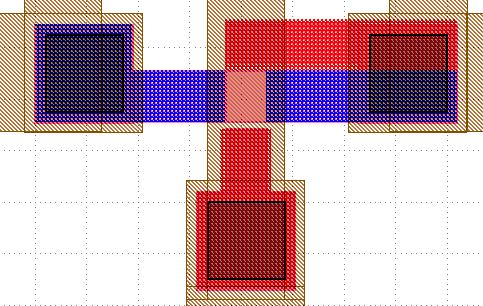

#### Paper transistor 

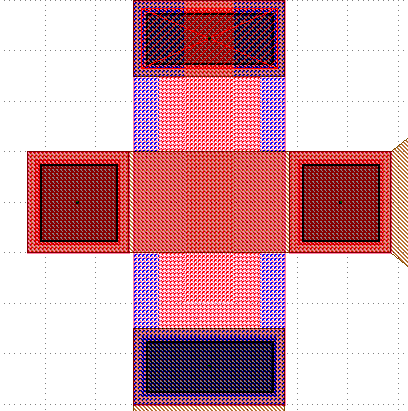





La fréquence de gain unitaire peut être décrite comme ceci : 
$$Ft = \frac{gm}{2\pi (C_{gs}+C_{gd})} $$
Soit le gain petit signal sur les capacités dominantes.
La valeur gm dépends de Vov, comme suit : 
$$ gm = \mu_n C_{ox} \frac{W}{L} (V_{gs}-V_t) $$
où 
$$V_t = V_{fb} + 2*\phi_F + \frac{\sqrt{2\epsilon_s qN_a(2\phi_F)}}{C_{ox}} $$
et
$$ V_{fb} = \phi_m - \phi_s - \frac{Q_{ox}}{C_{ox}} $$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cte

1.602176634e-19
0.6575145026839337
1.602176634e-19
1.602176634e-19


Text(0, 0.5, 'Vt')

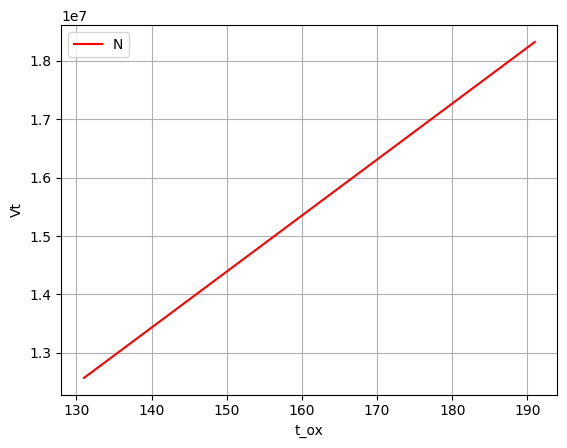

In [ ]:
# Commençons par les définitions simples (ugh) des variables comme les mobilitées
#https://lampz.tugraz.at/~hadley/psd/L4/mobility.php
# La mobilité est dépendante de la température et du taux de dopage
# Pour le silicium non dopé Na == Nd = 


def flatband_voltage(T, N_gate, gate_type, Q_ox=0, t_ox=0.14e-6, epsilon_ox=3.45e-13):
    """
    Calculate the flatband voltage (V_fb) for a MOSFET.

    Parameters:
    T (float): Temperature in Kelvin.
    N_gate (float): Doping concentration in the gate (cm^-3).
    gate_type (str): "n" for n-type gate, "p" for p-type gate.
    Q_ox (float): Oxide charge density (C/cm^2). Default: 0.
    t_ox (float): Oxide thickness (in meters). Default: 10 nm.
    epsilon_ox (float): Permittivity of silicon dioxide (F/cm). Default: 3.45e-13.

    Returns:
    float: Flatband voltage (V_fb) in volts.
    """
    # Constants
    k = cte.k  # Boltzmann constant in eV/K
    q = cte.e  # Elementary charge in C
    chi_si = 4.05  # Electron affinity of silicon in eV
    E_g = 1.12  # Bandgap of silicon in eV
    n_i = 1.5e10  # Intrinsic carrier concentration in cm^-3 (at room temp)
    
    # Thermal voltage
    V_t = k * T / q  # Thermal voltage in volts
    
    # Calculate Fermi potential of the gate
    phi_F_gate = V_t * np.log(N_gate / n_i)
    if gate_type == "p":
        phi_F_gate = -phi_F_gate  # Adjust for p-type gate
    
    # Metal work function (phi_m) for heavily doped gate
    phi_m = chi_si + E_g / 2 + phi_F_gate
    
    # Semiconductor work function (phi_s) for intrinsic silicon
    phi_s = chi_si + E_g / 2  # Fermi level is at midgap
    
    # Oxide capacitance
    C_ox = epsilon_ox / t_ox  # Oxide capacitance per unit area (F/cm^2)
    
    # Flatband voltage
    V_fb = phi_m - phi_s - Q_ox / C_ox
    
    return V_fb

def calculate_weighted_doping(regions, total_depth):
    """
    Calculate the resultant doping density with overlapping implants.

    Parameters:
    regions (list of tuples): Each tuple contains (doping_density, thickness) in cm^-3 and nm.
    total_depth (float): Total gate depth in nm.

    Returns:
    float: Resultant doping density in cm^-3.
    """
    total_doping = sum(density * thickness for density, thickness in regions)
    return total_doping / total_depth


def calculate_phi_F(doping_concentration,T):
    """
    Calculate the Fermi potential (phi_F) for a semiconductor.
    
    Parameters:
    doping_concentration (float): Doping concentration (N_A or N_D) in cm^-3.
    temperature (float): Temperature in Kelvin (K).
    
    Returns:
    float: Fermi potential phi_F in volts (V).
    """
    # Constants
    k = cte.k  # Boltzmann constant in eV/K
    q = cte.e  # Electron charge in C
    ni_300K = 1.5e10  # Intrinsic carrier concentration at 300 K in cm^-3
    Eg_300K = 1.12  # Silicon bandgap at 300 K in eV
    
    # Adjust ni for temperature
    Eg = Eg_300K  # Assuming Eg doesn't vary significantly with T
    ni = ni_300K * (T / 300)**(3/2) * np.exp(-Eg / (2 * k) * (1 / T - 1 / 300))  # ni(T)
    
    # Thermal voltage
    V_t = k * T / q  # Thermal voltage in volts
    
    # Fermi potential
    phi_F = V_t * np.log(doping_concentration / ni)
    
    return phi_F


# Assuming that the channel is intrinsic silicon, the Vt is lowered to be equal to the flatband voltage

regions = [
    (1.011e20, 90),  # Region 1: Combined CONT, Medium, and Standard (0–90 nm) # Sum of the doping levels
    (1e17, 130)       # Region 3: Standard only (130–220 nm)
]
doping = calculate_weighted_doping(regions,220)

t_ox = np.linspace(140,200,7)*1-9
channel_doping = 5e15
print(2*calculate_phi_F(doping_concentration=channel_doping,T=300))
Vt = flatband_voltage(T=300,N_gate=doping,gate_type='n',t_ox=t_ox) + 2*calculate_phi_F(doping_concentration=channel_doping,T=300) + np.sqrt(2*cte.e*1.04e-12*channel_doping*2*calculate_phi_F(channel_doping,300))/(3.45e-13/t_ox)

f1 = plt.figure()
plt.plot(t_ox, Vt, 'r-', label='N')
plt.grid()
plt.legend(loc='best')
plt.xlabel('t_ox')
plt.ylabel('Vt')  

###
